In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

In [2]:
def save_df(path, df):
    df.to_csv(path, index=False)

In [3]:
!wget 'https://raw.githubusercontent.com/EdwardNee/hse-ds-masters/main/odsa/fca_hw/datasets/smoking.csv'
!wget 'https://raw.githubusercontent.com/EdwardNee/hse-ds-masters/main/odsa/fca_hw/datasets/heart.csv'
!wget 'https://raw.githubusercontent.com/EdwardNee/hse-ds-masters/main/odsa/fca_hw/datasets/employee.csv'

--2023-12-04 18:42:51--  https://raw.githubusercontent.com/EdwardNee/hse-ds-masters/main/odsa/fca_hw/datasets/smoking.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6317929 (6.0M) [text/plain]
Saving to: ‘smoking.csv’

smoking.csv         100%[===================>]   6.02M  --.-KB/s    in 0.09s   

2023-12-04 18:42:51 (67.4 MB/s) - ‘smoking.csv’ saved [6317929/6317929]

--2023-12-04 18:42:52--  https://raw.githubusercontent.com/EdwardNee/hse-ds-masters/main/odsa/fca_hw/datasets/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 O

# **1. Datasets preprocessing**

## $1^{st} $ Dataset. [Heart Disease Dataset](https://www.kaggle.com/datasets/yasserh/heart-disease-dataset)


In [4]:
heart_data = data = pd.read_csv("heart.csv")

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
X = heart_data.drop("target", axis = 1)
y = heart_data["target"]

In [7]:
heart_categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
scaler = StandardScaler() #MinMaxScaler()
X[list(set(X.columns) - set(heart_categorical))] = scaler.fit_transform(X[list(set(X.columns) - set(heart_categorical))])

In [8]:
X = pd.get_dummies(X, columns = heart_categorical)
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [9]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train_h.shape, X_test_h.shape

((212, 30), (91, 30))

In [11]:
X_train_h.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
124,-1.694735,-2.148802,-0.913400,1.283627,-0.896862,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
72,-2.797624,-0.092738,-0.816773,2.289429,-0.896862,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
15,-0.481558,-0.663867,-0.526890,0.365287,0.483451,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
10,-0.040403,0.478391,-0.140381,0.452748,0.138373,0,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
163,-1.805024,0.364165,-1.377212,1.021244,-0.896862,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [12]:
# save_df("heart_prc.csv", X)

## $2^{nd} $ Dataset. [Body Signal Smoking](https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking)


In [13]:
smoking_data = data = pd.read_csv("smoking.csv")

smoking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [14]:
smoking_data['smoking'].value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

In [15]:
smoking_data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [58]:
smoking_data = smoking_data.sample(frac=0.01)

In [59]:
X = smoking_data.drop("smoking", axis = 1)
y = smoking_data["smoking"]

In [60]:
smoking_categorical = ['dental caries', 'gender', 'oral', 'tartar'] #'ID'
mm_scaler = MinMaxScaler() #StandardScaler()

to_scale = list(set(X.columns) - set(smoking_categorical + ['ID']))
X[to_scale] = mm_scaler.fit_transform(X[to_scale])

In [61]:
X = pd.get_dummies(X, columns = smoking_categorical, drop_first=True)

In [62]:
X.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries_1,gender_M,tartar_Y
4971,6270,0.461538,0.222222,0.266667,0.549091,0.071429,0.071429,0.0,0.0,0.522222,...,0.374449,0.703704,0.0,0.3,0.133333,0.085526,0.020478,0,0,0
27548,34369,0.230769,0.777778,0.666667,0.554545,0.112245,0.091837,0.0,0.0,0.322222,...,0.493392,0.722222,0.0,0.6,0.213333,0.177632,0.063140,0,1,0
41984,52501,0.307692,0.666667,0.333333,0.400000,0.091837,0.091837,0.0,0.0,0.222222,...,0.352423,0.703704,0.0,0.6,0.080000,0.125000,0.022184,1,1,0
39978,49945,0.384615,0.222222,0.400000,0.600000,0.091837,0.091837,1.0,0.0,0.355556,...,0.400881,0.435185,0.0,0.0,0.160000,0.105263,0.051195,0,0,1
17847,22268,0.615385,0.555556,0.333333,0.563636,0.071429,0.091837,0.0,0.0,0.700000,...,0.202643,0.601852,0.0,0.7,0.146667,0.157895,0.027304,1,1,0


In [63]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
X_train_s.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries_1,gender_M,tartar_Y
42546,53196,0.538462,0.444444,0.400000,0.581818,0.091837,0.142857,0.0,0.0,0.311111,...,0.488987,0.537037,0.0,0.1,0.093333,0.059211,0.027304,1,0,1
7675,9638,0.230769,0.777778,0.666667,0.727273,0.142857,0.142857,0.0,0.0,0.333333,...,0.475771,0.731481,0.0,0.4,0.346667,0.105263,0.030717,1,1,1
45454,4427,0.615385,0.666667,0.400000,0.509091,0.081633,0.091837,0.0,0.0,0.388889,...,0.577093,0.740741,0.0,0.7,0.186667,0.078947,0.051195,0,1,0
22489,28081,0.538462,0.444444,0.266667,0.512727,0.091837,0.091837,0.0,0.0,0.377778,...,0.348018,0.638889,0.0,0.3,0.306667,0.276316,0.414676,0,1,1
38397,47982,0.230769,0.888889,0.800000,0.825455,0.000000,0.061224,0.0,0.0,0.533333,...,0.246696,0.712963,0.0,0.7,0.306667,0.335526,0.083618,0,1,1


In [22]:
# save_df("smoking_prc.csv", X)

## $3^{rd} $ Dataset. [Employee Dataset](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset)


In [23]:
employee_data = pd.read_csv("employee.csv")

employee_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [24]:
employee_data['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

In [67]:
employee_data = employee_data.sample(frac=0.1)

In [68]:
X = employee_data.drop("LeaveOrNot", axis = 1)
y = employee_data["LeaveOrNot"]

In [69]:
empl_categorical = ['Education', 'City', 'Gender', 'EverBenched']
scaler = StandardScaler()

to_scale = list(set(X.columns) - set(empl_categorical))
X[to_scale] = mm_scaler.fit_transform(X[to_scale])

In [70]:
X = pd.get_dummies(X, columns = empl_categorical, drop_first=True)

In [71]:
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X_train_e

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
2454,0.833333,1.0,0.210526,0.571429,0,0,0,1,0,0
2609,0.500000,1.0,0.368421,0.142857,0,0,0,0,1,0
2525,0.833333,0.5,0.368421,0.285714,1,0,1,0,1,0
3025,1.000000,1.0,0.631579,0.428571,0,0,0,0,1,0
562,0.666667,1.0,0.263158,0.714286,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1047,0.833333,1.0,0.157895,0.428571,0,0,1,0,0,0
619,0.166667,1.0,0.210526,0.571429,0,0,0,0,1,1
282,0.500000,0.0,0.157895,0.428571,0,0,0,1,0,0
3638,1.000000,1.0,0.842105,0.000000,0,0,0,0,1,0


In [30]:
# save_df("employee_prc.csv", X)

# **2. Classification**

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from tqdm import tqdm

In [74]:
class ClassifiersApplier:
    def __init__(self, table_name: str = ""):
        self.results_cv = pd.DataFrame(columns=["Model", "Accuracy(Mean)", "Accuracy(Max)", "F1(Mean)", "F1(Max)"])
        self.results_cv.name = table_name


    def classify(self, X, y, cv: KFold, models: dict) -> pd.DataFrame:
        for c_name in tqdm(models.keys()):
            model = models[c_name]

            cv_acc = cross_val_score(model, X, y, cv = cv, scoring = "accuracy")
            cv_f1 = cross_val_score(model, X, y, cv = cv, scoring='f1')

            mean_accuracy = cv_acc.mean()
            max_accuracy = np.max(cv_acc)
            mean_f1 = cv_f1.mean()
            max_f1 = np.max(cv_f1)

            self.results_cv.loc[len(self.results_cv)] = [c_name, mean_accuracy, max_accuracy, mean_f1, max_f1]

        return self.get_results()


    def get_results(self) -> pd.DataFrame:
        return self.results_cv

## Heart desease dataset classification

In [75]:
models_heart = {
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=4),
    "Random Forest": RandomForestClassifier(n_estimators=15, random_state=0, max_depth=5),
    "XGBoost": XGBClassifier(learning_rate=0.01, n_estimators=10, max_depth=10, gamma=0.6, subsample=0.52,
                            colsample_bytree=0.6, seed=4, reg_lambda=2, booster='gbtree',
                            colsample_bylevel=0.6, colsample_bynode=0.5)
}


In [76]:
%%time
ca_h = ClassifiersApplier("Heart desease")
cv = KFold(n_splits=5, shuffle=True, random_state=42)
h_result = ca_h.classify(X_train_h, y_train_h, cv, models_heart)

100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

CPU times: user 1.26 s, sys: 16.8 ms, total: 1.28 s
Wall time: 900 ms


In [77]:
h_result

,Model,Accuracy(Mean),Accuracy(Max),F1(Mean),F1(Max)
0,KNN,0.844518,0.904762,0.855790,0.920000
1,Decision Tree,0.759468,0.833333,0.776845,0.862745
2,Random Forest,0.825471,0.880952,0.841987,0.897959
3,XGBoost,0.542746,0.571429,0.703091,0.727273


## Body Signal Smoking classification

In [78]:
models_smoking = {
    "KNN": KNeighborsClassifier(n_neighbors=150),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=4),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(learning_rate=0.01, n_estimators=50, max_depth=18, gamma=0.01, subsample=0.52,
                            colsample_bytree=0.9, seed=4, reg_lambda=4, booster='gbtree',
                            colsample_bylevel=0.7)
}

In [79]:
ca_s = ClassifiersApplier("Body Signal Smoking")
cv = KFold(n_splits=5, shuffle=True, random_state=42)
s_result = ca_s.classify(X_train_s.drop(columns = "ID"), y_train_s, cv, models_smoking)

100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


In [80]:
s_result

,Model,Accuracy(Mean),Accuracy(Max),F1(Mean),F1(Max)
0,KNN,0.699201,0.756410,0.648594,0.688525
1,Decision Tree,0.686314,0.717949,0.624020,0.722892
2,Random Forest,0.717150,0.782051,0.660916,0.750000
3,XGBoost,0.683883,0.794872,0.433016,0.619048


## Employee Dataset classification

In [81]:
models_employee = {
    "KNN": KNeighborsClassifier(n_neighbors = 5),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=10, random_state=0, max_depth=10),
    "XGBoost": XGBClassifier(learning_rate=0.05, n_estimators=50, max_depth=10, gamma=1.5, subsample=0.52,
                            colsample_bytree=0.9, seed=4, reg_lambda=4, booster='gbtree',
                            colsample_bylevel=0.7)
}

In [82]:
ca_e = ClassifiersApplier("Employee Dataset")
cv = KFold(n_splits=5, shuffle=True, random_state=42)
e_result = ca_e.classify(X_train_e, y_train_e, cv, models_employee)

100%|██████████| 4/4 [00:00<00:00,  5.46it/s]


In [83]:
e_result

,Model,Accuracy(Mean),Accuracy(Max),F1(Mean),F1(Max)
0,KNN,0.733802,0.824324,0.558452,0.745098
1,Decision Tree,0.801117,0.837838,0.720542,0.760000
2,Random Forest,0.806631,0.851351,0.725655,0.784314
3,XGBoost,0.790306,0.824324,0.637328,0.723404


# **3. Lazy FCA**

In [43]:
!git clone https://github.com/AndrewDiv/FCALC.git
import FCALC.fcalc as fcalc

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold

Cloning into 'FCALC'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 89 (delta 41), reused 72 (delta 24), pack-reused 0
Receiving objects: 100% (89/89), 27.58 KiB | 1.97 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [44]:
def fca_pattern(X_train, X_test, y_train):
    pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy())
    pat_cls.predict(X_test.values)

    return pat_cls

In [116]:
param_grid = {
    "method" : ["standard", "standard-support", "ratio-support"],
    "alpha" : [0.01, 0.05, 0.1, 0.3, 0.7, 0.9]
}

def run_gridsearch(X_train, y_train):
    grid = ParameterGrid(param_grid)
    metrics = ["accuracy", "f1"]
    bests = []
    for metric in metrics:
        best_score = 0
        best_params = {}
        for params in grid:
            skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

            scores = []

            for train_index, val_index in skf.split(X_train.values, y_train.to_numpy()):
                X_train_fold, X_val_fold = X_train.values[train_index], X_train.values[val_index]
                y_train_fold, y_val_fold = y_train.to_numpy()[train_index], y_train.to_numpy()[val_index]

                model = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy(),
                                                    categorical=np.arange(X_train.values.shape[1]), **params)

                model.predict(X_val_fold)

                score = accuracy_score(y_val_fold, model.predictions) if metric == "accuracy" else f1_score(y_val_fold, model.predictions, average='macro')
                scores.append(score)

                print(params, f"with {metric} {score}")

            avg_score = sum(scores) / len(scores)

            if avg_score > best_score:
                best_score = avg_score
                best_params = params

        bests.append({metric: [best_params, best_score, avg_score, scores]})
        print("\nЛучшие параметры:", best_params)
        print(f"Лучший результат {metric}", best_score)

    return bests


## Run GridSearch

In [117]:
heart_gc = run_gridsearch(X_train_h, y_train_h)

{'alpha': 0.01, 'method': 'standard'} with accuracy 0.8604651162790697
{'alpha': 0.01, 'method': 'standard'} with accuracy 0.9534883720930233
{'alpha': 0.01, 'method': 'standard'} with accuracy 0.8571428571428571
{'alpha': 0.01, 'method': 'standard'} with accuracy 0.9285714285714286
{'alpha': 0.01, 'method': 'standard'} with accuracy 0.8333333333333334
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.8604651162790697
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.9767441860465116
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.8809523809523809
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.9285714285714286
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.8571428571428571
{'alpha': 0.01, 'method': 'ratio-support'} with accuracy 0.8837209302325582
{'alpha': 0.01, 'method': 'ratio-support'} with accuracy 0.9069767441860465
{'alpha': 0.01, 'method': 'ratio-support'} with accuracy 0.8809523809523809
{'alpha': 0.01, 'metho

In [118]:
employee_gc = run_gridsearch(X_train_e, y_train_e)

{'alpha': 0.01, 'method': 'standard'} with accuracy 0.88
{'alpha': 0.01, 'method': 'standard'} with accuracy 0.8533333333333334
{'alpha': 0.01, 'method': 'standard'} with accuracy 0.9054054054054054
{'alpha': 0.01, 'method': 'standard'} with accuracy 0.8243243243243243
{'alpha': 0.01, 'method': 'standard'} with accuracy 0.918918918918919
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.88
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.8133333333333334
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.8918918918918919
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.8108108108108109
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.918918918918919
{'alpha': 0.01, 'method': 'ratio-support'} with accuracy 0.76
{'alpha': 0.01, 'method': 'ratio-support'} with accuracy 0.6933333333333334
{'alpha': 0.01, 'method': 'ratio-support'} with accuracy 0.6756756756756757
{'alpha': 0.01, 'method': 'ratio-support'} with accuracy 0.7162162

In [119]:
smoke_gc = run_gridsearch(X_train_s, y_train_s)

{'alpha': 0.01, 'method': 'standard'} with accuracy 0.8461538461538461
{'alpha': 0.01, 'method': 'standard'} with accuracy 0.8205128205128205
{'alpha': 0.01, 'method': 'standard'} with accuracy 0.782051282051282
{'alpha': 0.01, 'method': 'standard'} with accuracy 0.8076923076923077
{'alpha': 0.01, 'method': 'standard'} with accuracy 0.6493506493506493
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.9102564102564102
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.8589743589743589
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.7948717948717948
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.8461538461538461
{'alpha': 0.01, 'method': 'standard-support'} with accuracy 0.7272727272727273
{'alpha': 0.01, 'method': 'ratio-support'} with accuracy 0.8205128205128205
{'alpha': 0.01, 'method': 'ratio-support'} with accuracy 0.7307692307692307
{'alpha': 0.01, 'method': 'ratio-support'} with accuracy 0.6794871794871795
{'alpha': 0.01, 'method

## Results

In [124]:
#Uncomment
# h_result.loc[len(h_result)] = ["LazyFCA", "-", heart_gc[0]['accuracy'][1], "-", heart_gc[1]['f1'][1]]
# e_result.loc[len(e_result)] = ["LazyFCA", "-", employee_gc[0]['accuracy'][1], "-", employee_gc[1]['f1'][1]]
# s_result.loc[len(s_result)] = ["LazyFCA", "-", smoke_gc[0]['accuracy'][1], "-", smoke_gc[1]['f1'][1]]

In [115]:
# print(f"{heart_gc},\n\n {employee_gc}, \n\n{smoke_gc}")

[{'accuracy': [{'alpha': 0.9, 'method': 'ratio-support'}, 0.9057585825027686, 0.9057585825027686]}, {'f1': [{'alpha': 0.9, 'method': 'ratio-support'}, 0.9045864583577778, 0.9045864583577778]}],

 [{'accuracy': [{'alpha': 0.01, 'method': 'standard'}, 0.8763963963963965, 0.6772612612612612]}, {'f1': [{'alpha': 0.01, 'method': 'standard'}, 0.8695168239765103, 0.6626069085898935]}], 

[{'accuracy': [{'alpha': 0.01, 'method': 'standard-support'}, 0.8275058275058275, 0.698967698967699]}, {'f1': [{'alpha': 0.01, 'method': 'standard-support'}, 0.8267707927127799, 0.6947836731960333]}]


In [129]:
print("Heart desease dataset results")
h_result

Heart desease dataset results


,Model,Accuracy(Mean),Accuracy(Max),F1(Mean),F1(Max)
0,KNN,0.844518,0.904762,0.85579,0.92
1,Decision Tree,0.759468,0.833333,0.776845,0.862745
2,Random Forest,0.825471,0.880952,0.841987,0.897959
3,XGBoost,0.542746,0.571429,0.703091,0.727273
5,LazyFCA,-,0.905759,-,0.904586


In [130]:
print("Employee dataset results")
e_result

Employee dataset results


,Model,Accuracy(Mean),Accuracy(Max),F1(Mean),F1(Max)
0,KNN,0.733802,0.824324,0.558452,0.745098
1,Decision Tree,0.801117,0.837838,0.720542,0.76
2,Random Forest,0.806631,0.851351,0.725655,0.784314
3,XGBoost,0.790306,0.824324,0.637328,0.723404
4,LazyFCA,-,0.876396,-,0.869517


In [131]:
print("Smoking dataset results")
s_result

Smoking dataset results


,Model,Accuracy(Mean),Accuracy(Max),F1(Mean),F1(Max)
0,KNN,0.699201,0.75641,0.648594,0.688525
1,Decision Tree,0.686314,0.717949,0.62402,0.722892
2,Random Forest,0.71715,0.782051,0.660916,0.75
3,XGBoost,0.683883,0.794872,0.433016,0.619048
4,LazyFCA,-,0.827506,-,0.826771


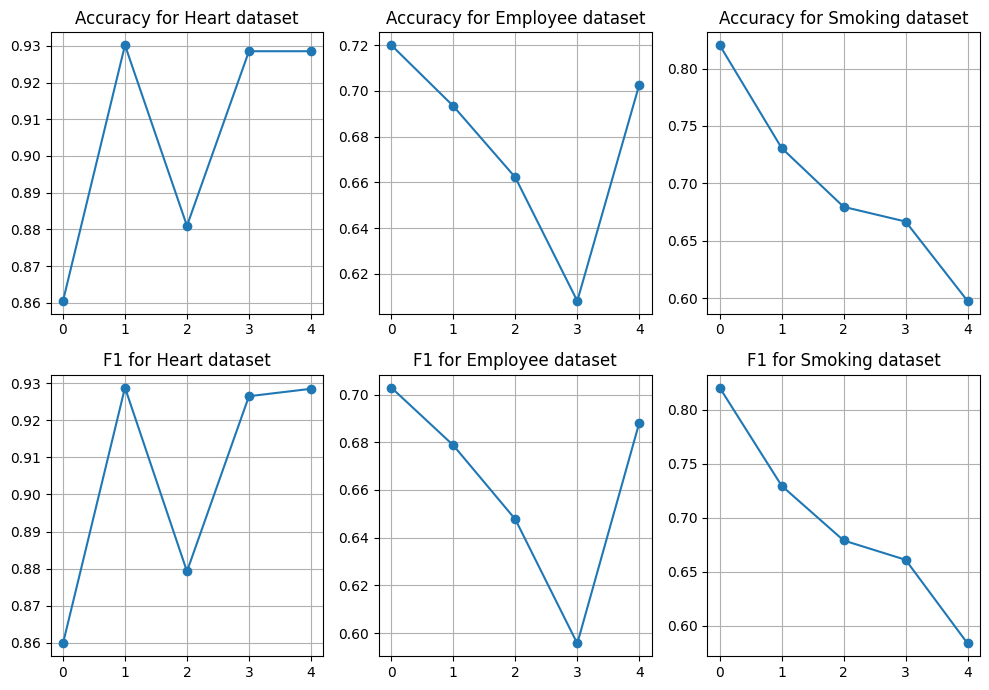

In [151]:
import matplotlib.pyplot as plt


scores1 = heart_gc[0]["accuracy"][3]
scores2 = employee_gc[0]["accuracy"][3]
scores3 = smoke_gc[0]["accuracy"][3]

scores11 = heart_gc[1]["f1"][3]
scores21 = employee_gc[1]["f1"][3]
scores31 = smoke_gc[1]["f1"][3]

plt.figure(figsize=(10, 7))

plt.subplot(2, 3, 1)
plt.plot(scores1, marker='o')
plt.title('Accuracy for Heart dataset')
plt.grid()

plt.subplot(2, 3, 2)
plt.plot(scores2, marker='o')
plt.title('Accuracy for Employee dataset')
plt.grid()

plt.subplot(2, 3, 3)
plt.plot(scores3, marker='o')
plt.title('Accuracy for Smoking dataset')
plt.grid()

plt.subplot(2, 3, 4)
plt.plot(scores11, marker='o')
plt.title('F1 for Heart dataset')
plt.grid()

plt.subplot(2, 3, 5)
plt.plot(scores21, marker='o')
plt.title('F1 for Employee dataset')
plt.grid()

plt.subplot(2, 3, 6)
plt.plot(scores31, marker='o')
plt.title('F1 for Smoking dataset')
plt.grid()

plt.tight_layout()
plt.show()


# **Report**
I took randomly 1% and 10%  of the smoking and employee dataset repsectively, to run model training fastly.  

Previously preprocessed data with StandardScaler and MinMaxScaler, also used onehot encoding for some categorical features.

Running FCA model on greedsearch params:

```
{
    "method" : ["standard", "standard-support", "ratio-support"],
    "alpha" : [0.01, 0.05, 0.1, 0.3, 0.7, 0.9]
}
```
got the best results by f1 and accuracy scores (tables can be found in cells above).

I implemented greedsearch with cross-validation and the results:

---
### Heart desease dataset.

Best result among sklearn models showed KNN algo with 0.904762 and 0.92 accuracy and f1. We have 0.905758 and 0.9045864 for these scores with params {'alpha': 0.9, 'method': 'ratio-support'} and {'alpha': 0.9, 'method': 'ratio-support'} which is not the best between all the models.

---

### Employee dataset

Best result showed RandomForrestClassifier with 0.851351 accuracy and 0.784314 f1. We have 0.8763963 and 0.8695168 with LazyFCA, which is noticeably better, than other models.

---

### Smoking dataset

Best result showed RandomForrestClassifier with 0.782051 accuracy and 0.75 f1. We have 0.827506 and 0.826771 with LazyFCA, which is also better score.


For each of the datasets lazyFCA score graph while running GreedSearch illustrated. Most of the best scores are got on earlier stages.